# California Housing Prices Dataset

In this notebook, I explore the California Housing dataset using regression. The dataset contains various housing features and it's cost.

In [1]:
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Uploading a dataset

In [2]:
dataset_path = kagglehub.dataset_download("camnugent/california-housing-prices")
df = pd.read_csv(dataset_path + "/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


All features may affect the final price of the house, we do not remove the features.

## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Missing values

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


There are 207 row with NaN, and you can't delete them because there is only one NaN, so we'll replace the NaN with the median of this feature.

In [6]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Duplicated

In [8]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


There are no duplicates

### Describe stats

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot feature distributions

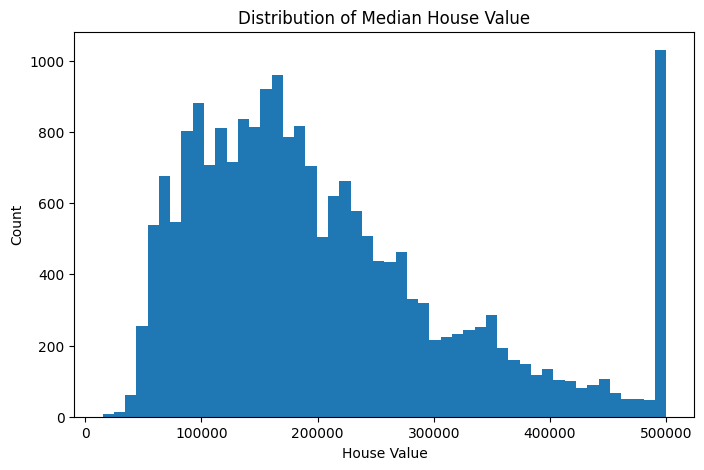

In [10]:

plt.figure(figsize=(8, 5))
plt.hist(df["median_house_value"], bins=50)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Count")
plt.show()


The graph shows the uneven distribution of prices in the dataset.

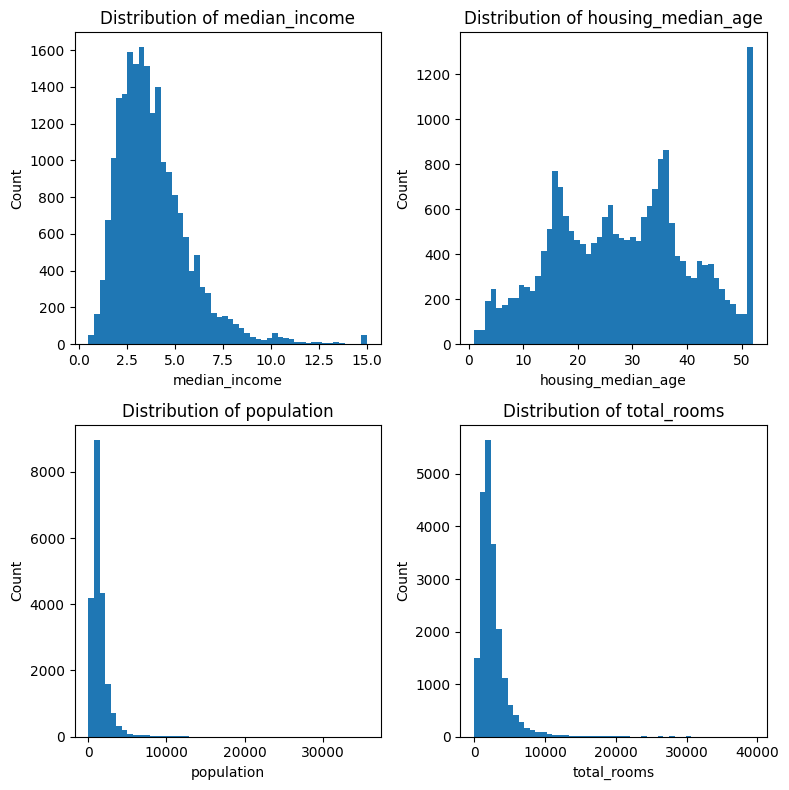

In [11]:
features = ["median_income", "housing_median_age", "population", "total_rooms"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for col, ax in zip(features, axes.flat):
    ax.hist(df[col], bins=50)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    
plt.tight_layout()
plt.show()


The graphs show an uneven distribution of data in the dataset, which may affect the regression.

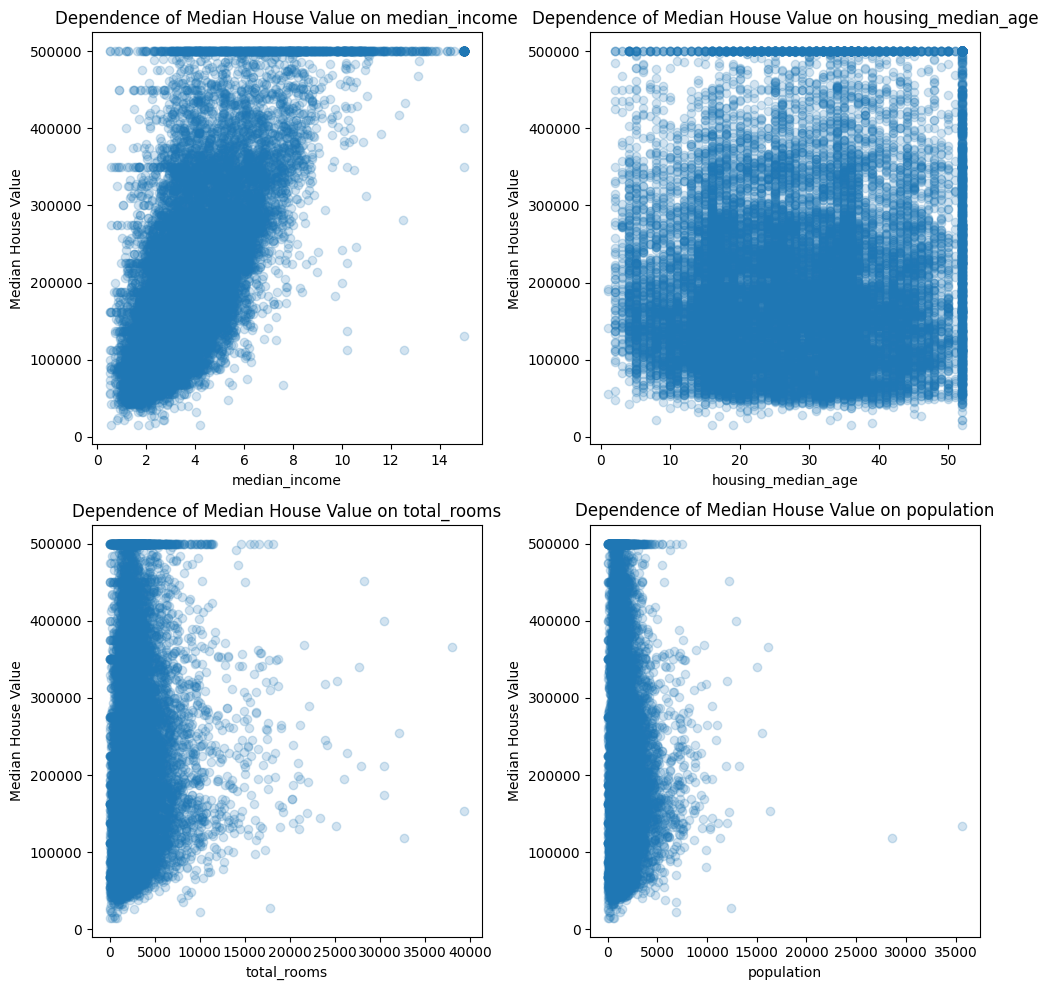

In [12]:
features = [
    "median_income",
    "housing_median_age",
    "total_rooms",
    "population"
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for col, ax in zip(features, axes.flat):
    ax.scatter(df[col], df["median_house_value"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Median House Value")
    ax.set_title(f"Dependence of Median House Value on {col}")
    
plt.tight_layout()
plt.show()


### Outliers

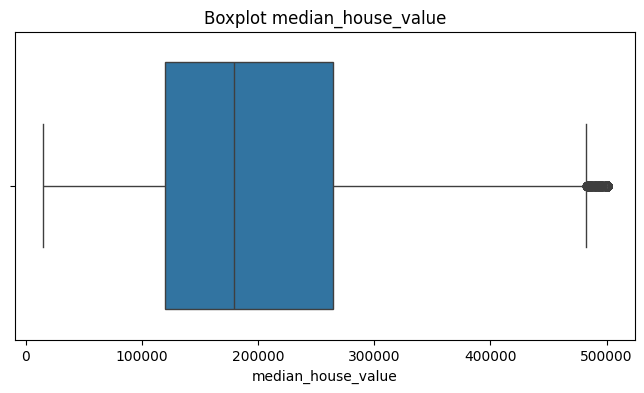

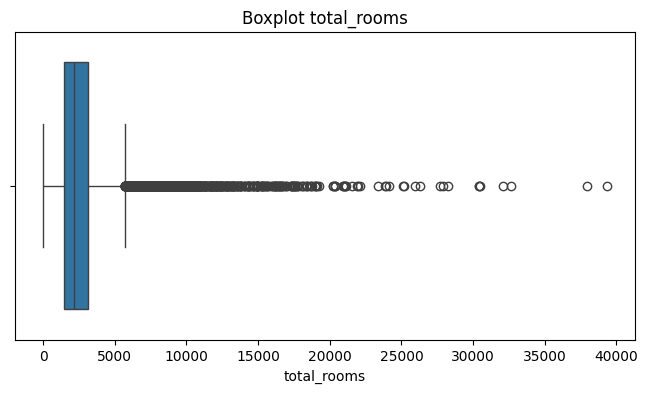

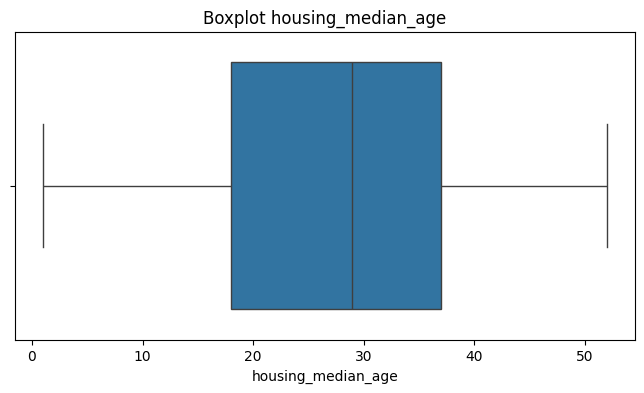

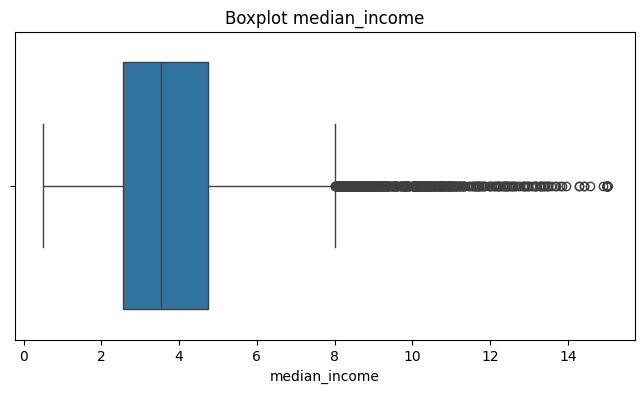

In [13]:
features = [
    "median_house_value",
    "total_rooms",
    "housing_median_age",
    "median_income"
]

for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    
plt.show()

The graphs show a large number of outliers in the data.

### Correlation

In [14]:
df_corr = df.corr(numeric_only=True)

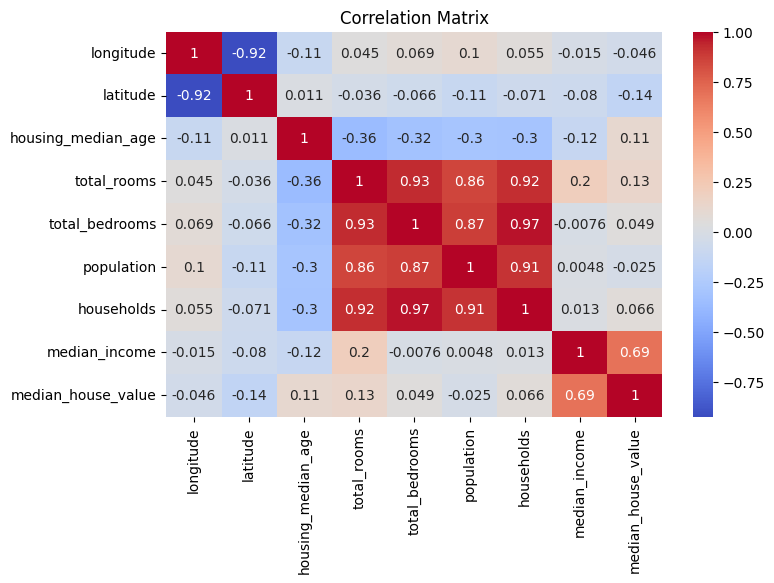

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows that the key feature for price formation is median_income.

### Multicolleniarity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [17]:

X = df.drop(["ocean_proximity", "median_house_value"], axis=1)

X = sm.add_constant(X)

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]

vif_df.sort_values("VIF", ascending=False)


,feature,VIF
0,const,16671.831485
7,households,28.284141
5,total_bedrooms,26.882085
4,total_rooms,12.126382
2,latitude,8.826607
1,longitude,8.703623
6,population,6.261680
8,median_income,1.688920
3,housing_median_age,1.259064


Some features are strongly correlated with each other, which creates multicollinearity, which can have a bad effect on regression indicators.

## Feature engineering

### Mlticollinearity solution

In [18]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [19]:
features_for_vif = [
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "rooms_per_household",
    "population_per_household",
    "bedrooms_per_room"
]

X = df[features_for_vif]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_df.sort_values("VIF", ascending=False)


,feature,VIF
3,households,78.672056
1,total_bedrooms,65.247215
0,total_rooms,32.456612
2,population,16.481632
6,bedrooms_per_room,6.532058
4,rooms_per_household,5.340337
5,population_per_household,1.144494


The multicollinearity of the ratio-features is less

In [20]:
df = df.drop([
    "total_rooms",
    "total_bedrooms",
    "population",
    "households"
], axis=1)

### One-Hot-encoding for categorial feature

In [21]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True, dtype=int)

In [22]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,1,0
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,1,0
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,1,0


### Split Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
Y = df["median_house_value"]

X = df.drop("median_house_value", axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Scaling the features

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fit the model

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Evaluating the Model

We will evaluate the model using 4 metrics:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, make_scorer

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Mean Squared Error: 4989303215.88
Mean Absolute Error: 51625.65
Root Mean Squared Error: 70635.00
R²: 0.61


The R² score is 0.61, the model explains 61% of the data in the dataset.
Outliers in the data didn't affect the best result of the linear model. But for a linear model, the result is quite decent.

## Improving the result using gradient descent

### GridSeatch

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1],
    'colsample_bytree': [0.7],
    'reg_alpha': [0, 1, 10],
    'n_estimators': [100, 250, 400]
}

In [65]:
xgb_model = XGBRegressor(
    random_state=42,
    verbosity=0
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [66]:
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0}
Лучший R² на кросс-валидации: 0.8459357990564685


### Fit the model on best parameters

In [72]:
xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.1,
    colsample_bytree=0.7,
    reg_alpha=0
)

In [73]:
xgb_model.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.7
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

### Evaluating the model

In [74]:
y_pred = xgb_model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Mean Squared Error: 2029780759.13
Mean Absolute Error: 29362.81
Root Mean Squared Error: 45053.09
R²: 0.85


In [76]:
xgb_model.feature_importances_

array([0.03783927, 0.03435579, 0.01650859, 0.14255674, 0.0295485 ,
       0.02029861, 0.03917911, 0.6084733 , 0.01660039, 0.02586434,
       0.02877534], dtype=float32)

Gradient boosting showed a much better result than the linear model, which is not surprising.

## Conclusion

In this notebook, I explored the California Housing dataset using regression. The task was to teach the model to predict housing prices. I performed exploratory data analysis and used feature engineering to solve the multicollinearity problem. I trained and tested a linear model with an R² score of 0.61. For such unevenly distributed data, the result is quite good. As an experiment, I trained and tested a gradient boosting model with an R² score of 0.85.
